In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from tools import generate_input
from models import ContinuousReverseGame, ContinuousGameOfLife

Defining _f_

In [2]:
def continuous_game_2(cell, around_cell, almost_zero=0.01, border=0.4):

    x1 = tf.math.maximum(((8-around_cell)/(8-3))*almost_zero, (3+border-around_cell)/border )
    x2 = tf.math.maximum((around_cell-(3-border))/border, around_cell*almost_zero/3 )

    x3 = tf.math.maximum((cell-(1-border))/border, cell*almost_zero)

    x4 = tf.math.maximum((around_cell-(2-border))/border, around_cell*almost_zero/2 )

    x12 = tf.math.minimum(x1,x2)
    x34 = tf.math.minimum(x3,x4)

    x5 = tf.math.minimum(x1,x34)
    xx = tf.math.maximum(x12,x5)

    return xx

Plotting _f_

The colour indicates the state of the cell for the next step


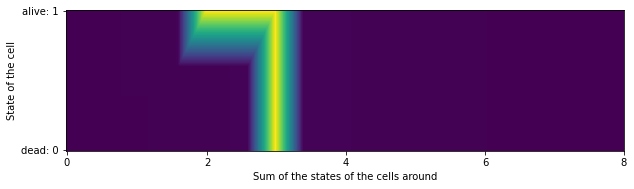

In [3]:
around_cell_possible_values = np.arange(0, 8.00001, 0.02)
cell_possible_values = np.arange(1.0000, -0.0000001,-0.01)

around_cell = [list(around_cell_possible_values)]*len(cell_possible_values)
cell = [list(cell_possible_values)] * len(around_cell_possible_values)

around_cell = np.array(around_cell)
cell = np.array(cell)
cell = np.transpose(cell)

around_cell = tf.constant(around_cell)
cell = tf.constant(cell)

xx = continuous_game_2(cell, around_cell)

plt.figure(figsize=(10,4))
plt.imshow(xx, vmin=0, vmax=1)

plt.xticks([0, 101, 201, 301, 401], [0,2,4,6, 8])
plt.yticks([0,100], ['alive: 1', 'dead: 0'])
plt.ylabel('State of the cell')
plt.xlabel('Sum of the states of the cells around')

print('The colour indicates the state of the cell for the next step')


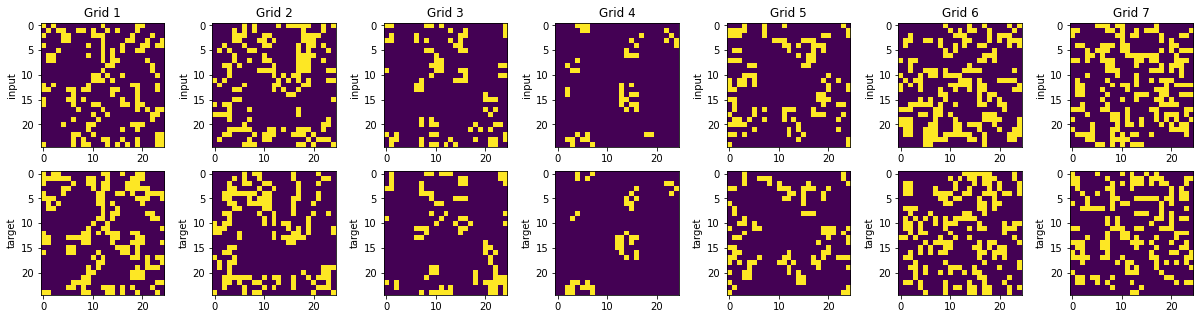

In [4]:
# generating some inputs and targets for the general mode

x, y = generate_input(trials=8, grid_shape=(25,25), steps_before_generating_output=2)


plt.figure(figsize=(3*len(x), 5))
for i in range(len(x)):
    plt.subplot(2, len(x), i+1)
    plt.title('Grid ' + str(i+1))
    plt.imshow(x[i])
    plt.ylabel('input')
    plt.subplot(2, len(x), len(x)+i+1)
    plt.imshow(y[i])
    plt.ylabel('target')    

In [5]:
# We train the reverse model with the function f defined above

game = ContinuousGameOfLife(continuous_game_2)
reverse_game = ContinuousReverseGame(continuous_game_2, 0.1, 0.3, 25)


In [6]:
reverse_game.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

reverse_game.fit(y[:1], y[:1], epochs=500)


1/1 [==============================] - 0s 3ms/sample - loss: 0.0395
Epoch 258/500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0395
Epoch 259/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0395
Epoch 260/500
1/1 [==============================] - 0s 5ms/sample - loss: 0.0395
Epoch 261/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0395
Epoch 262/500
1/1 [==============================] - 0s 4ms/sample - loss: 0.0395
Epoch 263/500
1/1 [==============================] - 0s 4ms/sample - loss: 0.0395
Epoch 264/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0395
Epoch 265/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0395
Epoch 266/500
1/1 [==============================] - 0s 3ms/sample - loss: 0.0395
Epoch 267/500
1/1 [==============================] - 0s 4ms/sample - loss: 0.0395
Epoch 268/500
1/1 [==============================] - 0s 5ms/sample - loss: 0.0395
Epoch 269/500
1/1 [===========

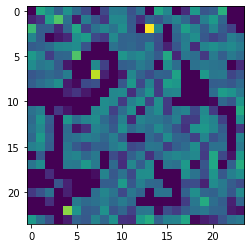

In [9]:
f = reverse_game.get_weights()[0]

# we take away the padding
f = f[:,1:-2, 1:-2]

plt.imshow(f[0], vmin=0, vmax=1 )


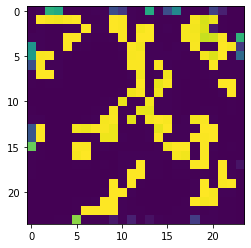

In [10]:
plt.imshow(game(f)[0], vmin=0, vmax=1)